In [9]:
import app.calibration as cal
import app.edges as e
import app.warp as w
import app.lane_finder as lf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from moviepy.editor import VideoFileClip
import matplotlib.image as mpimg
from IPython.display import HTML
%matplotlib inline

(720, 1280, 3)

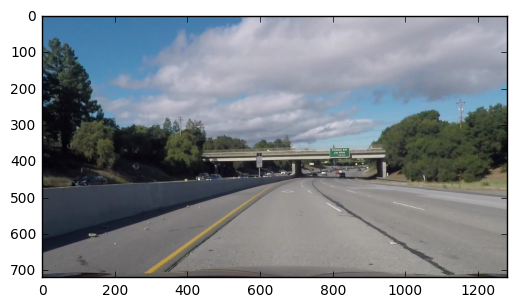

In [47]:
img = cv2.imread('extra/test5.jpg')
#img = cv2.imread('test_images/test1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (1280,720))
calibrator= cal.Camera_calibrator()
calibrator.initialize()
undist = calibrator.calibrate(img)
warped = w.warp(undist)
plt.imshow(undist)
undist.shape

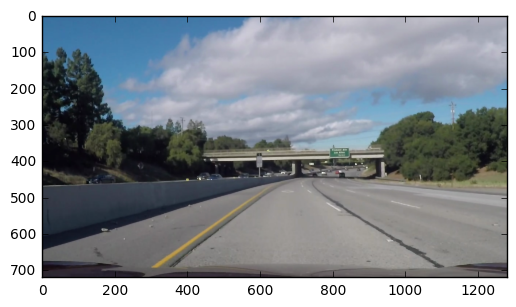

In [48]:
blur = cv2.bilateralFilter(img,5,100,100)
plt.imshow(blur)

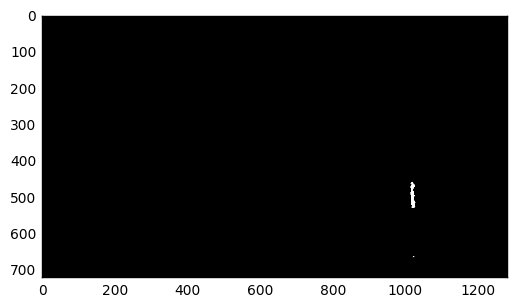

In [49]:
gray = cv2.cvtColor(warped, 7)
#gray = cv2.equalizeHist(gray)
mask = cv2.inRange(gray, 200, 255)
plt.imshow(mask, cmap='gray')

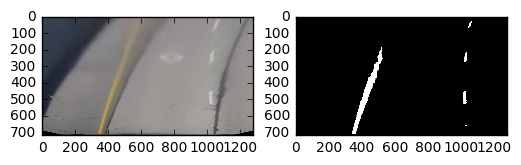

In [60]:
edges = e.Edges(warped, equalize=False)
_ = edges.gradient_color_channel(200,255,2,space=cv2.COLOR_RGB2HLS)
_ = edges.gradient_color_channel(190,255,0,space=cv2.COLOR_RGB2LUV)
gl = edges.gradient_color_channel(140,255,2,space=cv2.COLOR_RGB2LAB)
gx = edges.gradient_color_inrange(180, 255, combine=True, space=cv2.COLOR_RGB2GRAY)


plt.subplot(1,2,1)
plt.imshow(warped)

plt.subplot(1,2,2)
plt.imshow( edges.combined, cmap='gray' )


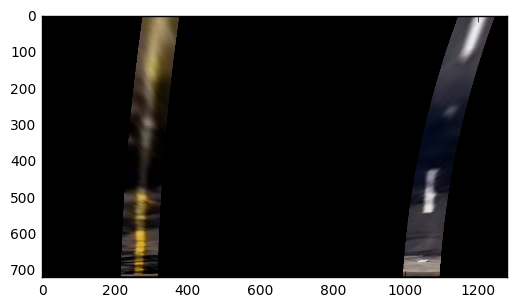

In [14]:
lane_detector = lf.LaneDetector(edges.combined)
left_fit, right_fit, left_lane_inds, right_lane_inds, _ = lane_detector.find_lanes()
mask = lf.plot_lanes_bw(img, left_fit, right_fit, warped.shape, 50)
#lanes_img = w.unwarp(lanes_img)
#final = cv2.addWeighted(img,0.7,lanes_img,0.8,0)
#print(left_lane_inds.shape)
res = cv2.bitwise_and(warped,warped, mask= mask)
plt.imshow(res)


In [15]:
margin = 20
ploty = np.linspace(0, binary.shape[0]-1, binary.shape[0])
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]


left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
ed_combined = cv2.cvtColor(edges.combined, cv2.COLOR_GRAY2RGBA)
cv2.fillPoly(ed_combined, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(ed_combined, np.int_([right_line_pts]), (0,255, 0))
plt.imshow(ed_combined)


NameError: name 'binary' is not defined

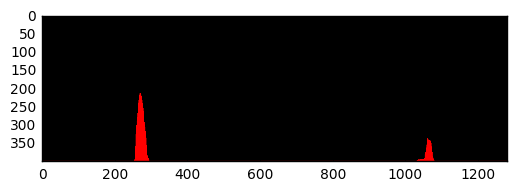

In [16]:
hist_img = lane_detector.make_hist()
plt.imshow(hist_img)

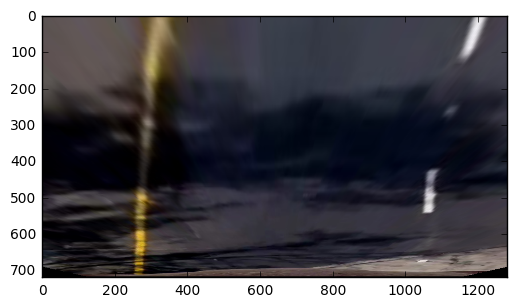

In [17]:
edg = cv2.cvtColor(edges.combined, cv2.COLOR_GRAY2RGB)
edg = edg*255
plt.imshow(warped, cmap='gray')

In [18]:
def processor(img):
    undist = calibrator.calibrate(img)
    warped = w.warp(undist)
    edges = e.Edges(warped, equalize=False)
    
    #_ = edges.gradient_color_channel(180,255,2,cv2.COLOR_RGB2HLS)
    #_ = edges.gradient_color_channel(225,255,0,cv2.COLOR_RGB2LUV)
    #_ = edges.gradient_color_channel(180,200,2,cv2.COLOR_RGB2LAB)    
    
    _ = edges.gradient_color_channel(220,255,0,space=cv2.COLOR_RGB2LUV)
    _ = edges.gradient_color_channel(150,255,2,space=cv2.COLOR_RGB2LAB)
    _ = edges.gradient_color_inrange(180, 255, space=cv2.COLOR_RGB2GRAY)
        
        
    lane_detector = lf.LaneDetector(edges.combined)
    left_fit, right_fit, left_lane_inds, right_lane_inds = lane_detector.find_lanes()
    lanes_img = lf.plot_lanes(img, left_fit, right_fit, warped.shape, fill=False)
    lanes_img = w.unwarp(lanes_img)
    final = cv2.addWeighted(img,0.7,lanes_img,0.99,0)
    l_img = final        
    
    x_offset=y_offset=10
    s_img = edges.combined*255
    s_img = cv2.cvtColor(s_img, cv2.COLOR_GRAY2RGB)
    s_img_x, s_img_y = int((s_img.shape[1]/3)), int((s_img.shape[0]/3))
    s_img = cv2.resize(s_img, (s_img_y, s_img_y))
    
    l_img = final
    l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img
    
    x_offset = x_offset + 10 + s_img.shape[1]
    hist_img = lane_detector.make_hist()
    hist_img = cv2.resize(hist_img, (int(1280*0.3), s_img_y))
    l_img[y_offset:y_offset+hist_img.shape[0], x_offset:x_offset+hist_img.shape[1]] = hist_img
    
    edg_x = 525
    x_offset = int(x_offset + 10 + hist_img.shape[1])
    edg = cv2.cvtColor(edges.combined, cv2.COLOR_GRAY2RGB)
    edg = edg*255
    edg = cv2.resize(edg, (edg_x, s_img_y))
    l_img[y_offset:y_offset+edg.shape[0], x_offset:x_offset+edg.shape[1]] = edg
    
    return l_img

def handle_image(img):
    try:
        return processor(img)
    except:
        pass
    return img

In [19]:
im = cv2.imread('extra/test4.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (1280, 720))
im = processor(im)
plt.imshow(im)

ValueError: too many values to unpack (expected 4)

In [ ]:
left_fit

In [20]:
import numpy as np

class Stabilizer:
    """ Smooth out fitted curves by keeping previous fits and averaging out """
    def __init__(self, window=5):
        self.log_left = np.zeros((window, 3))
        self.log_right = np.zeros((window, 3))
        self.count = 0
        self.window = window

    def stabilize(self, left, right):
        """ stabilize the coff """
        if self.count < self.window:
            self.log_left[self.count,] = left
            self.log_right[self.count,] = right
            self.count += 1
            return left, right
        
        window = self.window-1
        print('window: {}'.format(window))
        self.log_left[0:self.log_left.shape[0]-1,] = self.log_left[1:, ]
        self.log_left[window,] = left

        self.log_right[0:self.log_right.shape[0]-1,] = self.log_right[1:, ]
        self.log_right[window,] = right

        left_avg = self.log_left[:,0].mean(), self.log_left[:,1].mean(), self.log_left[:,2].mean()
        right_avg = self.log_right[:,0].mean(), self.log_right[:,1].mean(), self.log_right[:,2].mean()

        return left_avg, right_avg

In [21]:
#import app.stabilizer as st

la = [1,2,3]
lb = [4,5,6]
lc = [7,8,9]
ld = [10,11,12]
le = [13,14,15]

ra = [10,20,30]
rb = [40,50,60]
rc = [70,80,90]
rd = [100,110,120]
re = [130,140,150]
stab = Stabilizer(window=4)

In [22]:
stab.stabilize(la, ra)
stab.stabilize(lb, rb)
stab.stabilize(lc, rc)
stab.stabilize(ld, rd)
stab.stabilize(le, re)

window: 3


((8.5, 9.5, 10.5), (85.0, 95.0, 105.0))

In [23]:
a = np.array([la,lb,lc, ld])
a[0:a.shape[0]-1:,] = a[1:]
a

array([[ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [10, 11, 12]])

In [29]:
a[0,] = [22,33,44]

In [40]:
np.mean([5,8,11,14])

9.5

In [24]:
stab.log_left

array([[  1.,   2.,   3.],
       [  4.,   5.,   6.],
       [  7.,   8.,   9.],
       [ 13.,  14.,  15.]])

In [48]:
x1 = [1,3,8,2,4,2]
y1 = [2,5,3,3,4,2]
cof, err, _, _, _ =  np.polyfit(x1,y1,3, full=True)

In [51]:
err[0]

2.4676607977003213

In [25]:
window = img[0:, :, :]
window.shape

(720, 1280, 3)

In [46]:
yuv = cv2.cvtColor(window, cv2.COLOR_RGB2YUV)

yuv = 255 - yuv
hls = cv2.cvtColor(window, cv2.COLOR_RGB2HLS)
chs = np.stack((yuv[:, :, 1], yuv[:, :, 2], hls[:, :, 2]), axis=2)
gray = np.mean(chs, 2)

gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
print(gray_rgb.shape)

edges = e.Edges(chs)

e_hls = edges.gradient_color_channel(250,255,2,space=cv2.COLOR_RGB2HLS)
e_luv = edges.gradient_color_channel(200,255,0,space=cv2.COLOR_RGB2LUV)
e_lab = edges.gradient_color_channel(160,255,2,space=cv2.COLOR_RGB2LAB)
e_gray = edges.gradient_color_inrange(180, 255, combine=True, space=cv2.COLOR_RGB2GRAY)

error: /home/travis/miniconda/conda-bld/work/opencv-3.1.0/modules/imgproc/src/color.cpp:7935: error: (-215) depth == CV_8U || depth == CV_16U || depth == CV_32F in function cvtColor


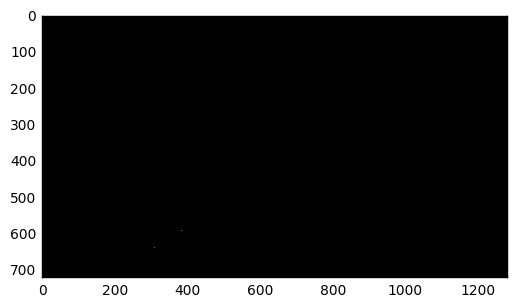

In [242]:
plt.imshow(e_gray, cmap='gray')

In [441]:
def generate_mask(warped):
    edges = e.Edges(warped)
    #_ = edges.gradient_color_channel(180,255,2,space=cv2.COLOR_RGB2HLS)
    #_ = edges.gradient_color_channel(225,255,0,space=cv2.COLOR_RGB2LUV)
    #_ = edges.gradient_color_channel(155,200,2,space=cv2.COLOR_RGB2LAB)
    
    a = edges.gradient_color_channel(0,120,2,space=cv2.COLOR_RGB2YUV, combine=True)
    #_ = edges.gradient_color_channel(150,255,0,space=cv2.COLOR_RGB2LUV) # white
    #a = edges.gradient_color_channel(170,255,2,space=cv2.COLOR_RGB2LUV, combine=True) # white
    b = edges.gradient_color_channel(200,255,0,space=cv2.COLOR_RGB2LAB, combine=True) # yellow
    #_ = edges.gradient_color_channel(210,255,1,space=cv2.COLOR_RGB2LAB) # yellow
    #_ = edges.gradient_color_inrange(180, 255, combine=True, space=cv2.COLOR_RGB2GRAY)
    
    #return cv2.bitwise_or(a,b)
    
    return edges.combined

def prepare_img(img):
    calibrator = cal.Camera_calibrator()
    calibrator.initialize()
    undist = calibrator.calibrate(img)
    warped = w.warp(undist)
    return generate_mask(warped), warped


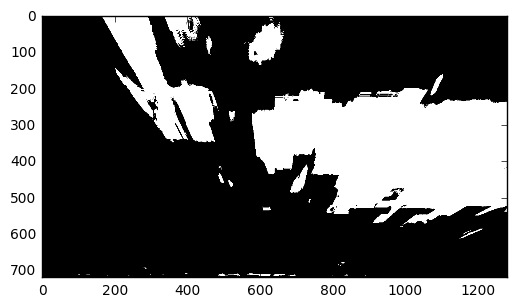

In [442]:
img = cv2.imread('failed/image135.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
chan = 0
img[:,:,chan] = img[:,:,chan]*2
#img[:,:,1] = 0
#img[:,:,2] = 0
img = img.astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
chan = 1
img[:,:,chan] = img[:,:,chan]

img = cv2.cvtColor(img, cv2.COLOR_LUV2RGB)
prepared, warped = prepare_img(img)
plt.imshow(prepared, cmap='gray')

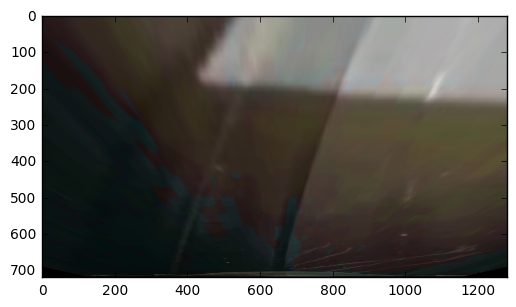

In [344]:
plt.imshow(warped)

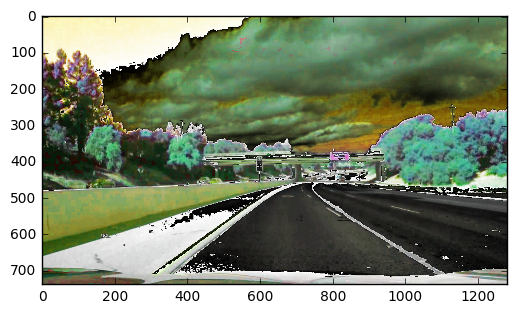

In [274]:
img = cv2.imread('extra/test5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
#chan = 0
#img[:,:,chan] = img[:,:,chan]/2

#chan = 2
#img[:,:,chan] = img[:,:,chan]/2
img = img*2


img = img.astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
plt.imshow(img)
#clahe = cv2.createCLAHE(clipLimit=0.1, tileGridSize=(16,16))
#res = clahe.apply(img)
#res = cv2.cvtColor(res, cv2.COLOR_GRAY2RGB)
#plt.imshow(res)

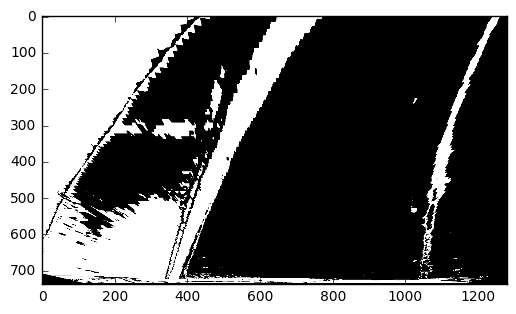

In [203]:
warped = w.warp(img)
edges = e.Edges(warped, equalize=False)
_ = edges.gradient_color_channel(200,255,2,space=cv2.COLOR_RGB2HLS)
_ = edges.gradient_color_channel(190,255,0,space=cv2.COLOR_RGB2LUV)
gl = edges.gradient_color_channel(140,255,2,space=cv2.COLOR_RGB2LAB)
gx = edges.gradient_color_inrange(180, 255, combine=True, space=cv2.COLOR_RGB2GRAY)

plt.imshow(edges.combined, cmap='gray')